In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', 200)

In [3]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [4]:
# 将拉取从2010年初到2016 年3 月初的数据
start_date = pd.to_datetime('2000-01-01')
stop_date = pd.to_datetime('2023-03-01')

In [5]:
spy = pdr.get_data_yahoo('SPY', start_date, stop_date)
aapl = pdr.get_data_yahoo('AAPL', start_date, stop_date)
hms = pdr.get_data_yahoo('HMS', start_date, stop_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
spy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,94.595062,8164300
2000-01-04,143.531250,144.062500,139.640625,139.750000,90.895813,8089800
2000-01-05,139.937500,141.531250,137.250000,140.000000,91.058426,12177900
2000-01-06,139.625000,141.500000,137.750000,137.750000,89.595001,6227200
2000-01-07,140.312500,145.750000,140.062500,145.750000,94.798332,8066500
...,...,...,...,...,...,...
2023-02-22,399.519989,401.130005,397.019989,398.540009,395.555420,83742300
2023-02-23,401.559998,402.200012,396.250000,400.660004,397.659546,96242400
2023-02-24,395.420013,397.250000,393.640015,396.380005,393.411591,108194400


In [7]:
aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.849468,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.777850,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.789232,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.720933,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.755083,460734400
...,...,...,...,...,...,...
2023-02-22,148.869995,149.949997,147.160004,148.910004,148.704315,51011300
2023-02-23,150.089996,150.339996,147.240005,149.399994,149.193634,48394200
2023-02-24,147.110001,147.190002,145.720001,146.710007,146.507355,55469600


In [8]:
hms

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-27,25.584999,25.931,25.584999,25.813,25.813,0
2016-09-28,28.295000,28.295,28.295000,28.295,28.295,0
2017-06-01,120.000000,132.000,120.000000,121.750,121.750,75066
2017-06-02,123.500000,125.000,120.500000,123.250,123.250,41847


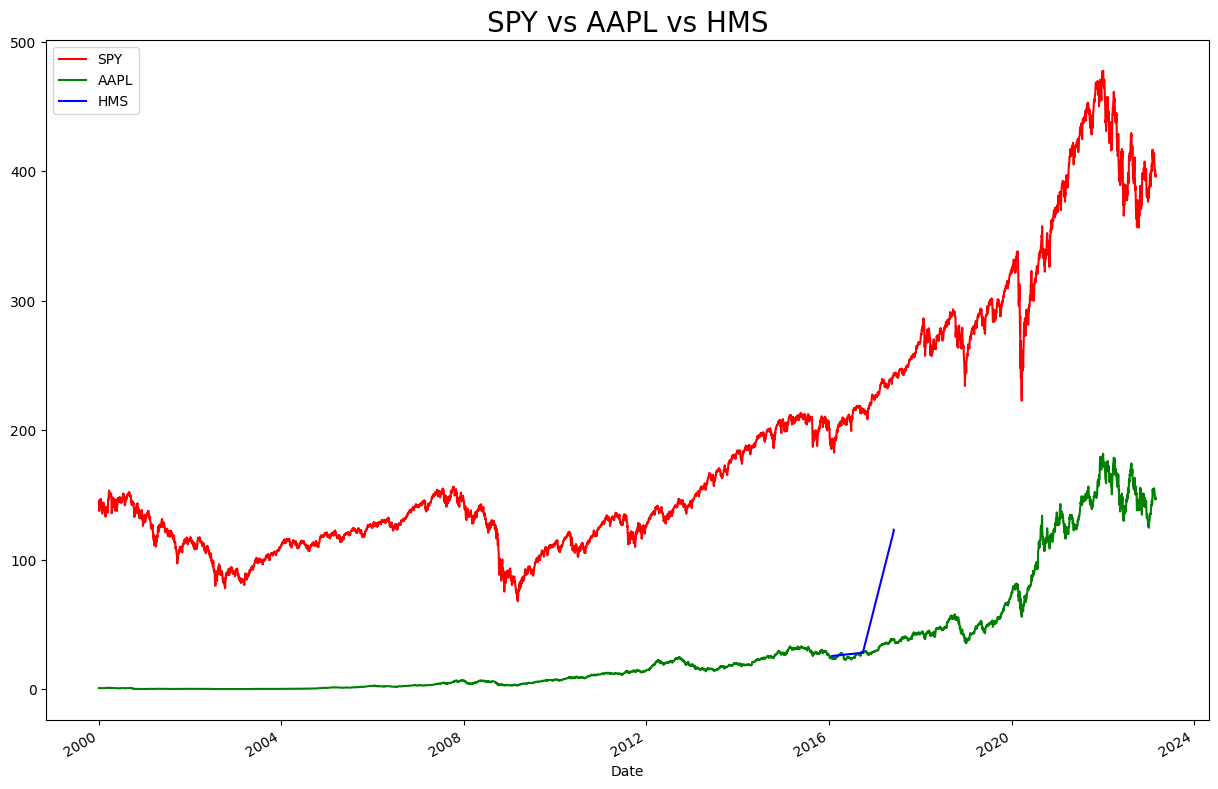

In [9]:
spy_c = spy['Close']
aapl_c = aapl['Close']
hms_c = hms['Close']
fig, ax = plt.subplots(figsize=(15,10))
spy_c.plot(color='r',label="SPY")
aapl_c.plot(color='g',label="AAPL")
hms_c.plot(color='b',label="HMS")
plt.title("SPY vs AAPL vs HMS", fontsize=20)
plt.legend()

In [10]:
first_open = spy['Open'].iloc[0]
first_open

148.25

In [11]:
last_open = spy['Open'].iloc[-1]
last_open

397.2300109863281

In [12]:
last_open-first_open

248.98001098632812

In [13]:
spy['Daily Change'] = pd.Series(spy['Close'] - spy['Open'])
spy['Daily Change']

Date
2000-01-03   -2.812500
2000-01-04   -3.781250
2000-01-05    0.062500
2000-01-06   -1.875000
2000-01-07    5.437500
                ...   
2023-02-22   -0.979980
2023-02-23   -0.899994
2023-02-24    0.959991
2023-02-27   -2.139984
2023-02-28   -0.970001
Name: Daily Change, Length: 5826, dtype: float64

In [14]:
spy['Daily Change'].sum()

43.449676513671875

In [15]:
import numpy as np
np.std(spy['Daily Change'])

1.9186867337113693

In [16]:
spy['Overnight Change'] = pd.Series(spy['Open'] - spy['Close'].shift(1))
np.std(spy['Overnight Change'])

1.524285867762003

In [17]:
# 使用支持向量回归，构建我们的模型
spy

,Open,High,Low,Close,Adj Close,Volume,Daily Change,Overnight Change
Date,,,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,94.595062,8164300,-2.812500,NaN
2000-01-04,143.531250,144.062500,139.640625,139.750000,90.895813,8089800,-3.781250,-1.906250
2000-01-05,139.937500,141.531250,137.250000,140.000000,91.058426,12177900,0.062500,0.187500
2000-01-06,139.625000,141.500000,137.750000,137.750000,89.595001,6227200,-1.875000,-0.375000
2000-01-07,140.312500,145.750000,140.062500,145.750000,94.798332,8066500,5.437500,2.562500
...,...,...,...,...,...,...,...,...
2023-02-22,399.519989,401.130005,397.019989,398.540009,395.555420,83742300,-0.979980,0.429993
2023-02-23,401.559998,402.200012,396.250000,400.660004,397.659546,96242400,-0.899994,3.019989
2023-02-24,395.420013,397.250000,393.640015,396.380005,393.411591,108194400,0.959991,-5.239990


In [18]:
for i in range(1,21,1):
    spy.loc[:,'Close Minus '+ str(i)] = spy['Close'].shift(i)

spy20 = spy[[x for x in spy.columns if 'Close Minus' in x or x == 'Close']].iloc[20:,]
spy20

,Close,Close Minus 1,Close Minus 2,Close Minus 3,Close Minus 4,Close Minus 5,Close Minus 6,Close Minus 7,Close Minus 8,Close Minus 9,...,Close Minus 11,Close Minus 12,Close Minus 13,Close Minus 14,Close Minus 15,Close Minus 16,Close Minus 17,Close Minus 18,Close Minus 19,Close Minus 20
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,147.000000,...,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000,145.437500
2000-02-02,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,144.750000,...,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000,139.750000
2000-02-03,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,144.437500,...,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000,140.000000
2000-02-04,142.593750,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,140.343750,...,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000,137.750000
2000-02-07,142.375000,142.593750,143.187500,141.062500,140.937500,139.562500,135.875000,140.250000,140.812500,141.937500,...,144.437500,144.750000,147.000000,145.812500,146.968750,145.000000,143.062500,144.500000,146.250000,145.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,398.540009,399.089996,407.260010,408.279999,413.980011,412.640015,412.829987,408.040009,407.089996,410.649994,...,409.829987,412.350006,416.779999,410.799988,406.480011,400.589996,405.679993,404.750000,400.350006,400.200012
2023-02-23,400.660004,398.540009,399.089996,407.260010,408.279999,413.980011,412.640015,412.829987,408.040009,407.089996,...,415.190002,409.829987,412.350006,416.779999,410.799988,406.480011,400.589996,405.679993,404.750000,400.350006
2023-02-24,396.380005,400.660004,398.540009,399.089996,407.260010,408.279999,413.980011,412.640015,412.829987,408.040009,...,410.649994,415.190002,409.829987,412.350006,416.779999,410.799988,406.480011,400.589996,405.679993,404.750000


In [19]:
spy20 = spy20.iloc[:,::-1]
spy20

,Close Minus 20,Close Minus 19,Close Minus 18,Close Minus 17,Close Minus 16,Close Minus 15,Close Minus 14,Close Minus 13,Close Minus 12,Close Minus 11,...,Close Minus 9,Close Minus 8,Close Minus 7,Close Minus 6,Close Minus 5,Close Minus 4,Close Minus 3,Close Minus 2,Close Minus 1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,145.437500,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,...,147.000000,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500
2000-02-02,139.750000,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,...,144.750000,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500
2000-02-03,140.000000,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,...,144.437500,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500
2000-02-04,137.750000,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,...,140.343750,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500,142.593750
2000-02-07,145.750000,146.250000,144.500000,143.062500,145.000000,146.968750,145.812500,147.000000,144.750000,144.437500,...,141.937500,140.812500,140.250000,135.875000,139.562500,140.937500,141.062500,143.187500,142.593750,142.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,400.200012,400.350006,404.750000,405.679993,400.589996,406.480011,410.799988,416.779999,412.350006,409.829987,...,410.649994,407.089996,408.040009,412.829987,412.640015,413.980011,408.279999,407.260010,399.089996,398.540009
2023-02-23,400.350006,404.750000,405.679993,400.589996,406.480011,410.799988,416.779999,412.350006,409.829987,415.190002,...,407.089996,408.040009,412.829987,412.640015,413.980011,408.279999,407.260010,399.089996,398.540009,400.660004
2023-02-24,404.750000,405.679993,400.589996,406.480011,410.799988,416.779999,412.350006,409.829987,415.190002,410.649994,...,408.040009,412.829987,412.640015,413.980011,408.279999,407.260010,399.089996,398.540009,400.660004,396.380005


In [25]:
from sklearn.svm import SVR
clf = SVR(kernel='linear')

In [31]:
X_train = spy20[:-1000]
y_train = spy20['Close'].shift(-1)[:-1000]
X_test = spy20[-1000:]
y_test = spy20['Close'].shift(-1)[-1000:]

In [33]:
model = clf.fit(X_train, y_train)
preds = model.predict(X_test)

In [34]:
tf = pd.DataFrame(list(zip(y_test, preds)), columns=['Next Day Close','Predicted Next Close'], index=y_test.index)
tf

,Next Day Close,Predicted Next Close
Date,,
2019-03-12,281.339996,279.802950
2019-03-13,281.160004,281.630129
2019-03-14,281.309998,281.541349
2019-03-15,282.329987,281.297253
2019-03-18,282.399994,282.529508
...,...,...
2023-02-22,400.660004,398.444723
2023-02-23,396.380005,401.505979
2023-02-24,397.730011,397.419152


In [35]:
cdc = spy[['Close']].iloc[-1000:]
ndo = spy[['Open']].iloc[-1000:].shift(-1)
tf1 = pd.merge(tf, cdc, left_index=True, right_index=True)
tf2 = pd.merge(tf1, ndo, left_index=True, right_index=True)
tf2.columns = ['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open']
tf2

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open
Date,,,,
2019-03-12,281.339996,279.802950,279.489990,280.480011
2019-03-13,281.160004,281.630129,281.339996,281.369995
2019-03-14,281.309998,281.541349,281.160004,280.540009
2019-03-15,282.329987,281.297253,281.309998,281.549988
2019-03-18,282.399994,282.529508,282.329987,283.510010
...,...,...,...,...
2023-02-22,400.660004,398.444723,398.540009,401.559998
2023-02-23,396.380005,401.505979,400.660004,395.420013
2023-02-24,397.730011,397.419152,396.380005,399.869995


In [36]:
def get_signal(r):
    if r['Predicted Next Close'] > r['Next Day Open']:
        return 1
    else:
        return 0
def get_ret(r):
    if r['Signal'] == 1:
        return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open']) * 100
    else:
        return 0
tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1))
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1))
tf2

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,PnL
Date,,,,,,
2019-03-12,281.339996,279.802950,279.489990,280.480011,0,0.000000
2019-03-13,281.160004,281.630129,281.339996,281.369995,1,-0.074632
2019-03-14,281.309998,281.541349,281.160004,280.540009,1,0.274467
2019-03-15,282.329987,281.297253,281.309998,281.549988,0,0.000000
2019-03-18,282.399994,282.529508,282.329987,283.510010,0,0.000000
...,...,...,...,...,...,...
2023-02-22,400.660004,398.444723,398.540009,401.559998,0,0.000000
2023-02-23,396.380005,401.505979,400.660004,395.420013,1,0.242778
2023-02-24,397.730011,397.419152,396.380005,399.869995,0,0.000000


In [37]:
(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum()

0.950103759765625

In [39]:
(spy['Close'].iloc[-1000:] - spy['Open'].iloc[-1000:]).sum()

58.44029235839844

In [42]:
def get_stats(s, n=252):
    s = s.dropna()
    wins = len(s[s>0])
    losses = len(s[s<0])
    evens = len(s[s==0])
    mean_w = round(s[s>0].mean(), 3)
    mean_l = round(s[s<0].mean(), 3)
    win_r = round(wins/losses, 3)
    mean_trd = round(s.mean(), 3)
    sd = round(np.std(s), 3)
    max_l = round(s.min(), 3)
    max_w = round(s.max(), 3)
    sharpe_r = round((s.mean()/np.std(s))*np.sqrt(n), 4)
    cnt = len(s)
    print('Trades:', cnt,\
    '\nWins:', wins,\
    '\nLosses:', losses,\
    '\nBreakeven:', evens,\
    '\nWin/Loss Ratio', win_r,\
    '\nMean Win:', mean_w,\
    '\nMean Loss:', mean_l,\
    '\nMean', mean_trd,\
    '\nStd Dev:', sd,\
    '\nMax Loss:', max_l,\
    '\nMax Win:', max_w,\
    '\nSharpe Ratio:', sharpe_r)
get_stats((spy['Close'].iloc[-1000:] - spy['Open'].iloc[-1000:])/spy['Open'].iloc[-1000:] * 100)

Trades: 1000 
Wins: 544 
Losses: 452 
Breakeven: 4 
Win/Loss Ratio 1.204 
Mean Win: 0.66 
Mean Loss: -0.746 
Mean 0.022 
Std Dev: 0.985 
Max Loss: -5.661 
Max Win: 4.799 
Sharpe Ratio: 0.3528


In [43]:
get_stats(tf2['PnL'])

Trades: 1000 
Wins: 264 
Losses: 245 
Breakeven: 491 
Win/Loss Ratio 1.078 
Mean Win: 0.699 
Mean Loss: -0.748 
Mean 0.001 
Std Dev: 0.716 
Max Loss: -3.484 
Max Win: 4.799 
Sharpe Ratio: 0.0265
